In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cvxpy as cp
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.covariance import graphical_lasso, empirical_covariance
from graph import draw_graph_in_map
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix

from graph import draw_graph, Node, get_graph
from data import get_nodes, get_scaled_data
from edge_discovery import glasso_opt

In [3]:
from graph import draw_graph_in_map
import pandas as pd
import geopandas as gpd
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix
from edge_discovery import euclidean_distance
from data import get_nodes
from shapely.geometry import Point
df = pd.read_csv('Node-Location.csv',sep=';')
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
nodes, nodes_ids = get_nodes()

In [4]:
nodes, nodes_ids = get_nodes()
df = get_scaled_data()

[[0.         0.         0.         0.46674419 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.2146775 ]
 [0.         0.         0.         0.         0.43144336 0.
  0.29731747 0.        ]
 [0.46674419 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.43144336 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.70187527 0.        ]
 [0.         0.         0.29731747 0.         0.         0.70187527
  0.         0.        ]
 [0.         0.2146775  0.         0.         0.         0.
  0.         0.        ]]


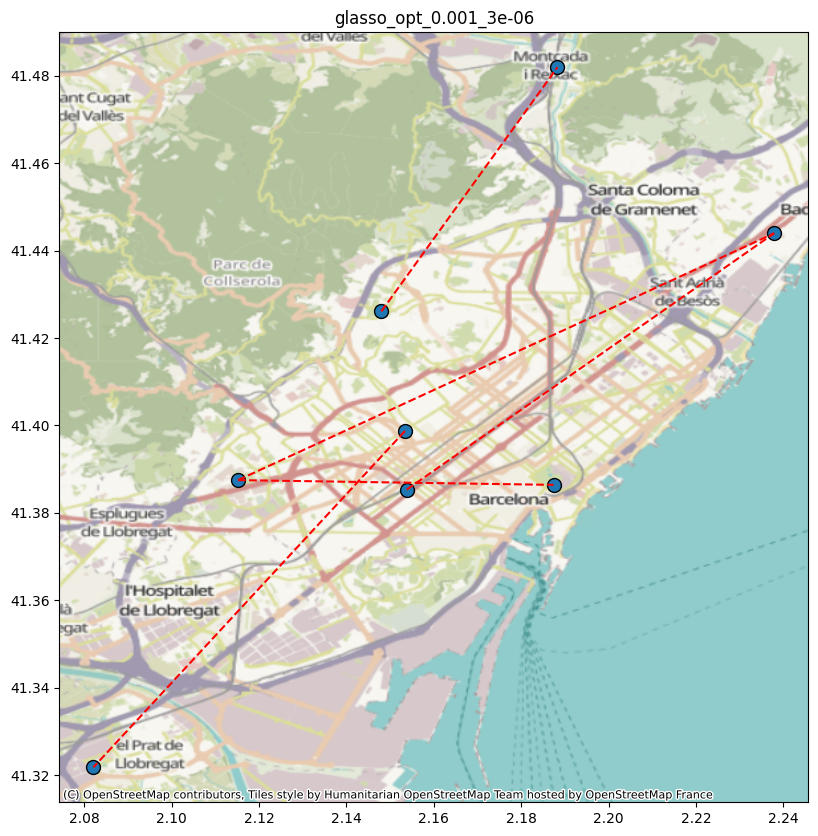

In [17]:
import numpy as np
threshold = 0.001
alpha = 0.000003

df = get_scaled_data()
W = glasso_opt(df, alpha, threshold)
edges = get_edges_from_adjacency_matrix(W)

draw_graph_in_map(gdf, edges, f'glasso_opt_{threshold}_{alpha}')

In [6]:
W

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [1]:
from graph import draw_graph_in_map
import pandas as pd
import geopandas as gpd
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix
from edge_discovery import euclidean_distance
from data import get_nodes
from shapely.geometry import Point
df = pd.read_csv('Node-Location.csv',sep=';')
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
nodes, nodes_ids = get_nodes()

[[ 9.99812075e-01 -3.56760317e-05 -4.01892819e-05 -3.07442855e-05
  -3.29255191e-05 -3.28816311e-05 -3.54148507e-05 -3.26872212e-05]
 [-3.56760317e-05  9.99812076e-01 -3.37507001e-05 -3.39830069e-05
  -3.55932767e-05 -3.22467820e-05 -3.80219634e-05 -3.40252182e-05]
 [-4.01892819e-05 -3.37507001e-05  9.99812075e-01 -2.92326189e-05
  -3.07559562e-05 -3.16387592e-05 -3.28014843e-05 -3.09383090e-05]
 [-3.07442855e-05 -3.39830069e-05 -2.92326189e-05  9.99812075e-01
  -3.86382907e-05 -3.10152551e-05 -3.55967103e-05 -3.62941707e-05]
 [-3.29255191e-05 -3.55932767e-05 -3.07559562e-05 -3.86382907e-05
   9.99812076e-01 -3.33504811e-05 -3.77461777e-05 -3.88302919e-05]
 [-3.28816310e-05 -3.22467820e-05 -3.16387592e-05 -3.10152551e-05
  -3.33504811e-05  9.99812074e-01 -3.10611295e-05 -3.43962110e-05]
 [-3.54148507e-05 -3.80219634e-05 -3.28014843e-05 -3.55967103e-05
  -3.77461777e-05 -3.10611295e-05  9.99812076e-01 -3.60154917e-05]
 [-3.26872212e-05 -3.40252182e-05 -3.09383090e-05 -3.62941707e-05
  -

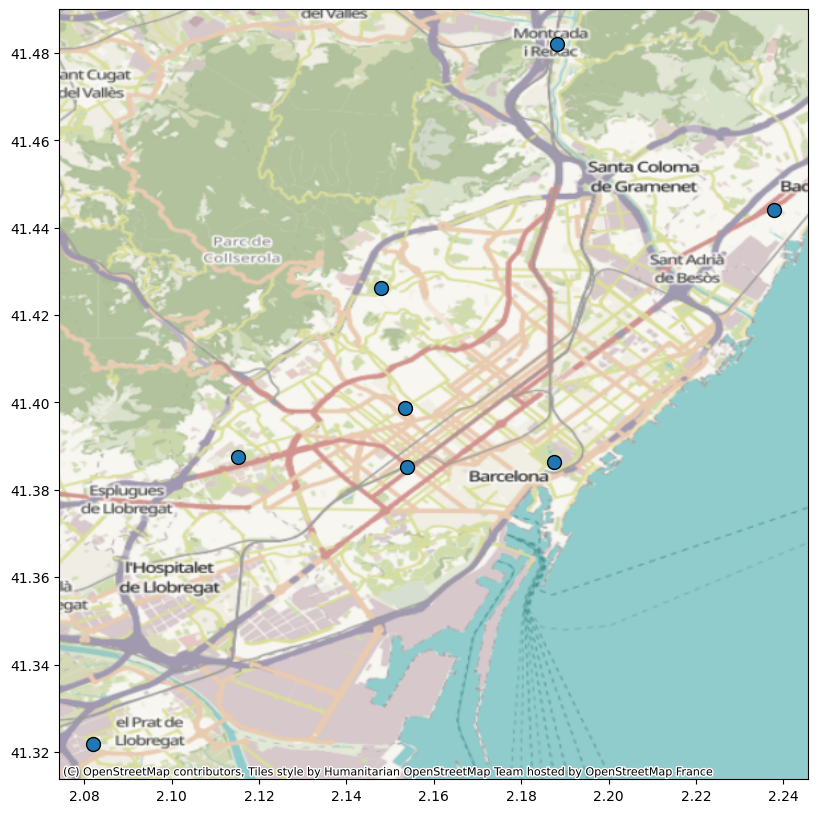

In [7]:
import numpy as np
threshold = 0.1
alpha = 0.0001

df = get_scaled_data()
W = glasso_opt(df, alpha, threshold)
print(W)
edges = get_edges_from_adjacency_matrix(W)

draw_graph_in_map(gdf, edges, f'glasso_opt_{threshold}_{alpha}')